# FitzHugh-Nagumo Model

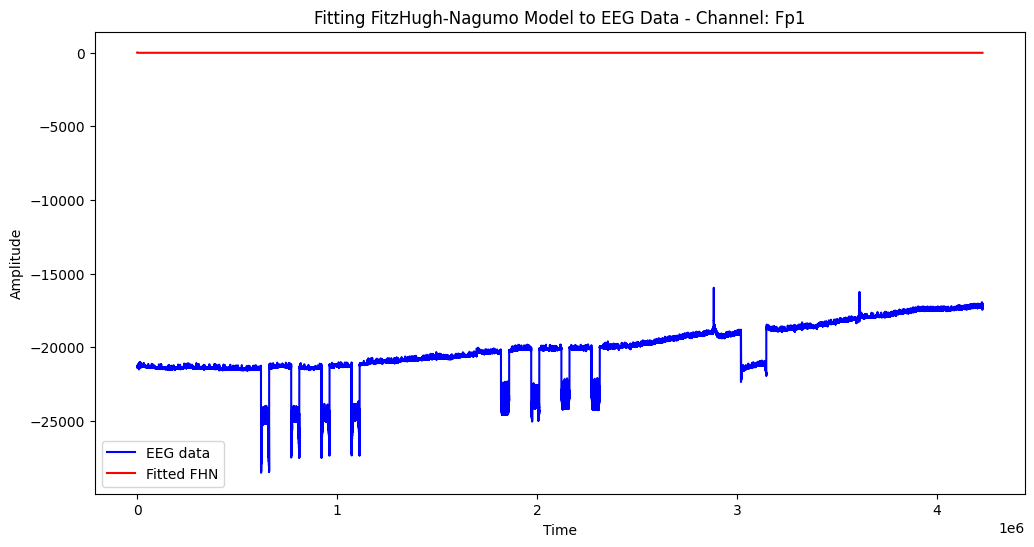

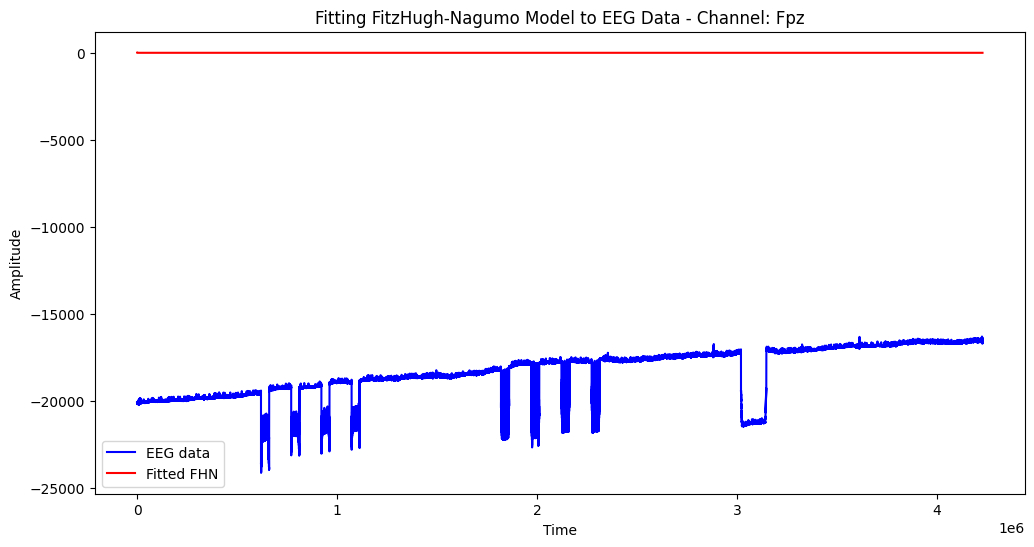

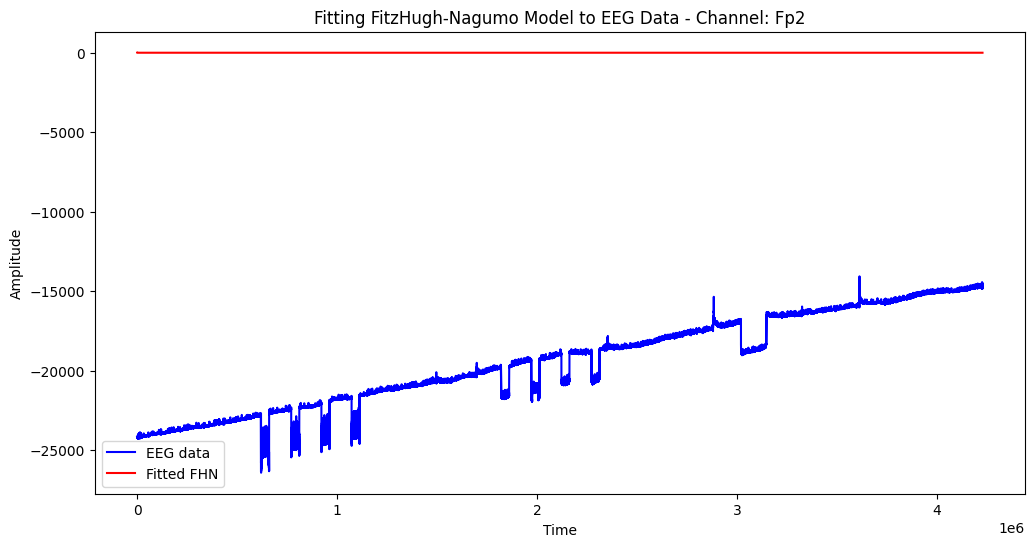

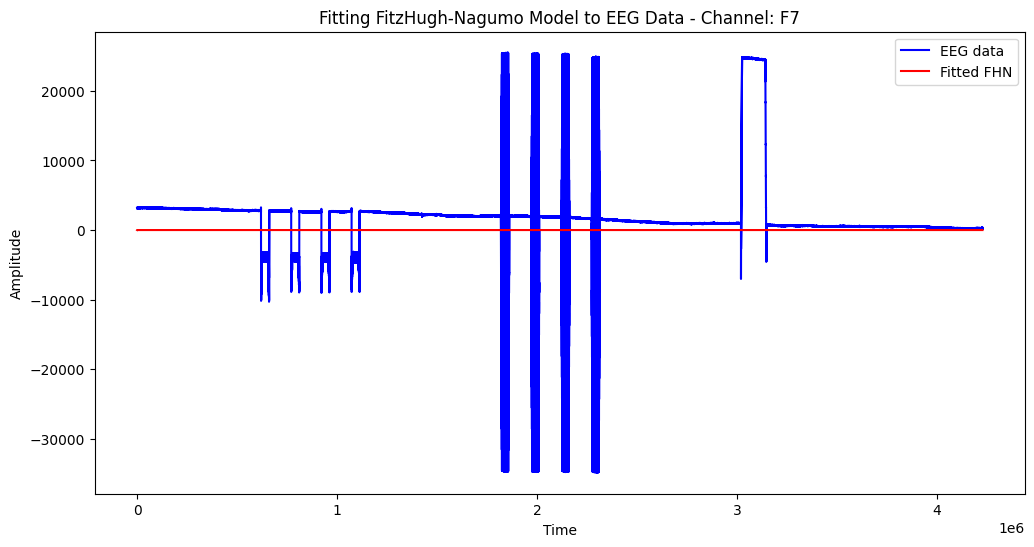

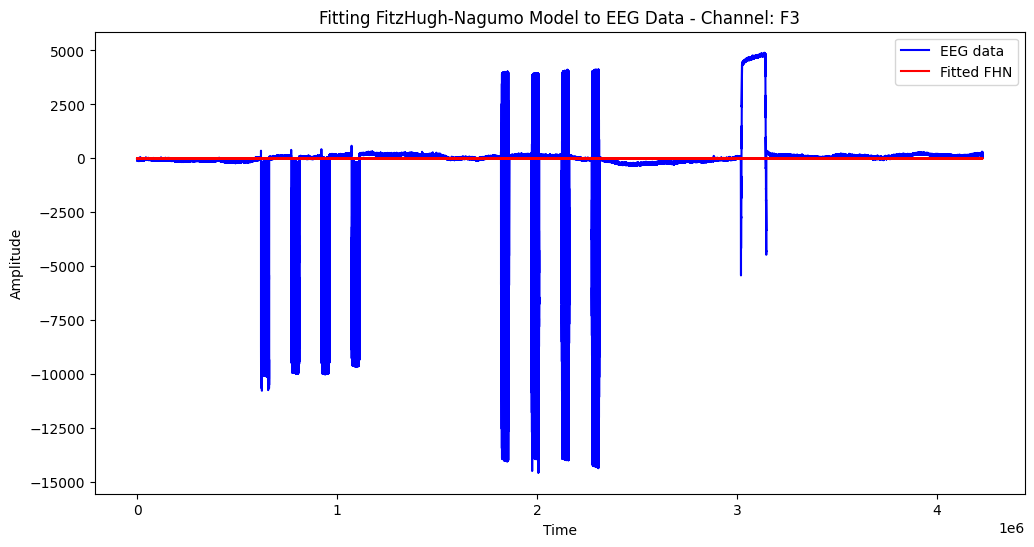

KeyboardInterrupt: 

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load EEG data
EEG_data = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Adjust the list to match your data's channels
eeg_channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# FitzHugh-Nagumo model
def fhn(Y, t, a, b, I_ext, epsilon):
    v, w = Y
    dvdt = v - v**3/3 - w + I_ext
    dwdt = epsilon * (v + a - b*w)
    return [dvdt, dwdt]

# Function to simulate FHN given a set of parameters
def simulate_fhn(params, t):
    a, b, I_ext, epsilon, v0, w0 = params
    Y0 = [v0, w0]
    sol = odeint(fhn, Y0, t, args=(a, b, I_ext, epsilon), atol=1e-10, rtol=1e-8)
    return sol[:, 0]  # returning v (membrane potential)

# Optimization boundaries for parameters [a, b, I_ext, epsilon, v0, w0]
bounds = [
    (-2, 2),     # a
    (0, 2),     # b
    (-2, 2),    # I_ext
    (0, 0.2),   # epsilon
    (-2, 2),    # v0
    (-2, 2)     # w0
]

# Objective function: the function to be minimized
def objective(params, t, eeg_data):
    simulated_data = simulate_fhn(params, t)
    error = np.sum((simulated_data - eeg_data)**2)
    return error

# Initial parameters guess [a, b, I_ext, epsilon, v0, w0]
params_initial = [0.7, 0.8, 0.5, 0.08, -1, 1]

# Time array for EEG data
t = np.linspace(0, len(EEG_data), len(EEG_data))

# Loop over all channels
for channel_index in range(EEG_data.shape[1]):
    single_channel_data = EEG_data[:, channel_index]
    
    # Optimize for the selected channel
    res = minimize(objective, params_initial, args=(t, single_channel_data), method='L-BFGS-B', bounds=bounds)

    # Extract the best fitting parameters
    best_params = res.x

    # Simulate FHN with the best parameters
    best_simulation = simulate_fhn(best_params, t)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(t, single_channel_data, label='EEG data', color='blue') 
    plt.plot(t, best_simulation, label='Fitted FHN', color='red')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Fitting FitzHugh-Nagumo Model to EEG Data - Channel: {eeg_channels[channel_index]}')
    plt.show()


In [4]:
import numpy as np
from scipy.integrate import odeint

# Define parameters for the FitzHugh-Nagumo model
a = 0.7
b = 0.8
I = 0.5  # Adjust this as necessary

# Define the FitzHugh-Nagumo system
def fitzhugh_nagumo(y, t):
    u, v = y
    dydt = [v - u**3/3 + I, -1/a * (u - b + v)]
    return dydt

# Initialize a list to store the solutions for each channel
solutions = []

# Solve the ODE system for each channel
for chan in range(nchan):
    y0 = EEGdata[0][chan], 0.0  # Initial conditions
    t = np.linspace(0, len(EEGdata) / fs, len(EEGdata))  # Time points
    solution = odeint(fitzhugh_nagumo, y0, t)  # Solve ODE
    solutions.append(solution)

# Now `solutions` is a list of arrays, each containing the solution for one channel